# 📈 Demand Forecasting using Facebook Prophet

In [1]:
# Step 1: Import Libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


Importing plotly failed. Interactive plots will not work.


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("/home/samande371322/Retail360/datasets/demand_forecast.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()


,date,region_id,product_category,brand,units_sold,price,marketing_spend
0,2024-01-01,R001,Laptop,Whirlpool,120,75000,28249
1,2024-01-01,R001,Smartphone,HP,127,30000,8814
2,2024-01-01,R001,AC,Samsung,28,45000,28589
3,2024-01-01,R001,TV,Whirlpool,81,60000,35565
4,2024-01-01,R001,Washing Machine,Sony,65,60000,25562


In [3]:
# Step 3: Filter data (example: Laptop sales in region R001)
filtered = df[(df['product_category'] == 'Laptop') & (df['region_id'] == 'R001')]
grouped = filtered.groupby('date').agg({'units_sold': 'sum'}).reset_index()
grouped.columns = ['ds', 'y']  # Prophet requires these column names
grouped.head()


,ds,y
0,2024-01-01,120
1,2024-01-02,26
2,2024-01-03,98
3,2024-01-04,118
4,2024-01-05,65


In [4]:
# Step 4: Initialize and Fit Prophet Model
model = Prophet()
model.fit(grouped)


13:15:03 - cmdstanpy - INFO - Chain [1] start processing


13:15:03 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
from prophet.serialize import model_to_json
import os

# Ensure folder exists
os.makedirs("/home/samande371322/Retail360/ml_models", exist_ok=True)

# Save Prophet model for Region R001 & Laptop
with open("/home/samande371322/Retail360/ml_models/prophet_model_R001_Laptop.json", "w") as f:
    f.write(model_to_json(model))


In [6]:
# Step 5: Create Future DataFrame
future = model.make_future_dataframe(periods=30)  # Forecast next 30 days
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
207,2024-07-26,100.670445,54.927842,144.937748
208,2024-07-27,88.341800,44.442258,128.496792
209,2024-07-28,101.513839,59.787191,144.768480
210,2024-07-29,87.435640,45.067626,126.153883
211,2024-07-30,96.766881,53.456428,137.249192


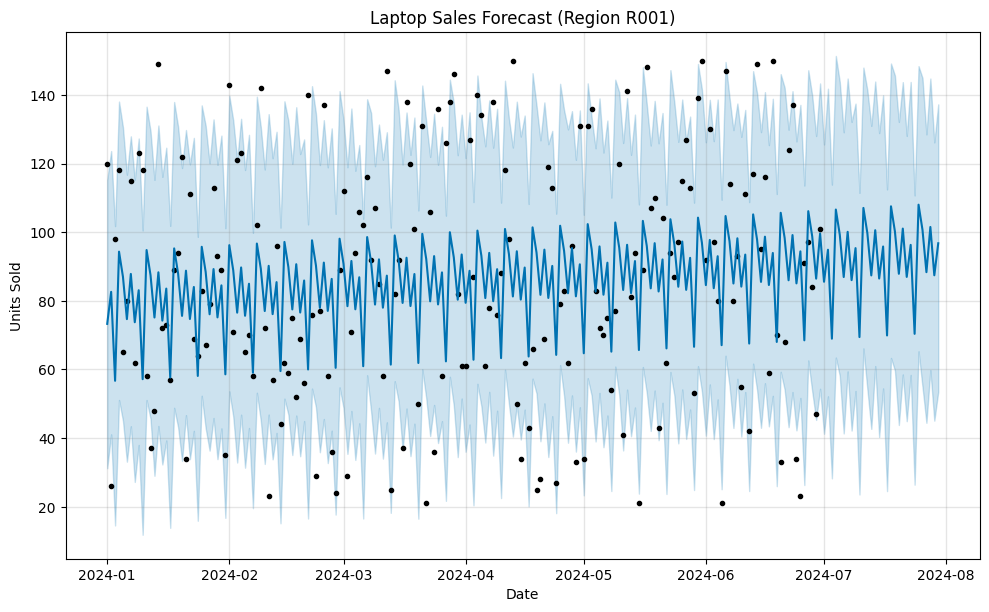

In [7]:
# Step 6: Plot Forecast
fig1 = model.plot(forecast)
plt.title("Laptop Sales Forecast (Region R001)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()


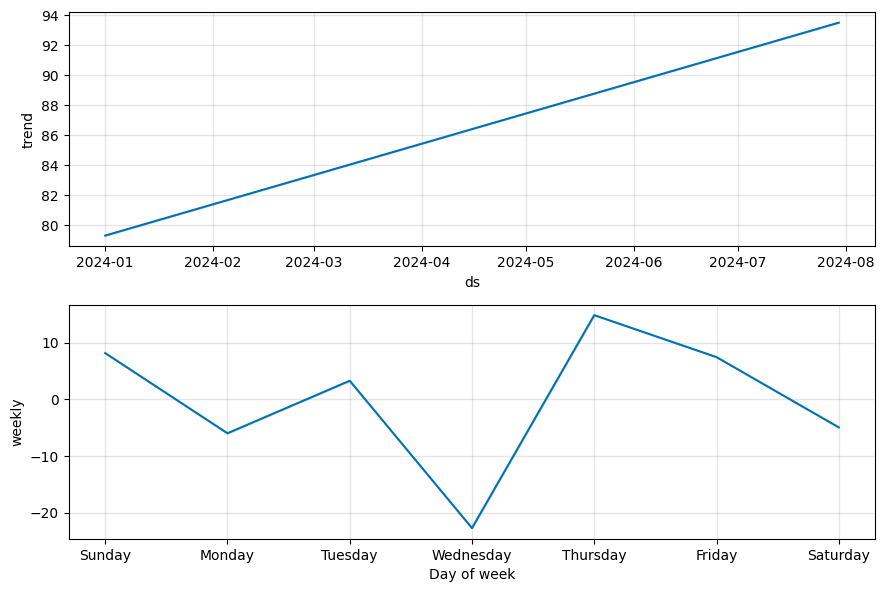

In [8]:
# Step 7: Plot Forecast Components
fig2 = model.plot_components(forecast)
plt.show()


You can change the `product_category` and `region_id` in Step 3 to forecast for other combinations.